# Fruits 360 - Convolutional Neural Networks Using TensorFlow

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

INFO:tensorflow:Using local port 23237
INFO:tensorflow:Using local port 20916
INFO:tensorflow:Using local port 24422
INFO:tensorflow:Using local port 19736
INFO:tensorflow:Using local port 20217
INFO:tensorflow:Using local port 21555
INFO:tensorflow:Using local port 21322
INFO:tensorflow:Using local port 22923
INFO:tensorflow:Using local port 23585
INFO:tensorflow:Using local port 22695


In [3]:
import os
from distutils.dir_util import copy_tree


fruits = '''
Pomegranate
Kaki
Pear
Avocado
Banana
Dates
Cocos
Mangostan
Lychee
Mulberry

'''.split()

for f in fruits:
    copy_tree("D:/data/fruits-360/Training/"+f, "D:/data/fruits-10-high-calorie/Training/"+f)
    copy_tree("D:/data/fruits-360/Test/"+f, "D:/data/fruits-10-high-calorie/Test/"+f)


DistutilsFileError: cannot copy tree 'D:/data/fruits-360/Training/Pomegranate': not a directory

## Creating Data Pipelines

In [5]:
train_ds_ = image_dataset_from_directory(
    'D:/data/fruits-10-high-calorie/Training',
    labels='inferred',
    label_mode='categorical',
    image_size=(100,100),
    interpolation='nearest',
    shuffle=True,
    batch_size=512
)

test_ds_ = image_dataset_from_directory(
    'D:/data//fruits-10-high-calorie/Test',
    labels='inferred',
    label_mode='categorical',
    image_size=(100,100),
    interpolation='nearest',
    shuffle=False,
    batch_size=512
)

# Pipeline
def convert_to_float(image, label):
    image = image / 255
    return image, label

AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = (
    train_ds_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)

test_ds = (
    test_ds_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)

Found 4653 files belonging to 10 classes.
Found 1567 files belonging to 10 classes.


## Defining the Model

In [6]:
model = keras.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), activation='relu', input_shape=(100,100,3)),
    layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), activation='relu'),
    layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), activation='relu'),
    layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu'),
    layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(train_ds._flat_shapes[1][1], activation='softmax')
])

In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 256)         2

## Training the Model

In [8]:
early_stopping = EarlyStopping(
    min_delta=1e-3,
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    train_ds,
    batch_size=512,
    validation_data=(test_ds),
    callbacks=[early_stopping],
    epochs=500,
    verbose=1
)

Epoch 1/500
10/10 [==============================] - 30s 3s/step - loss: 2.0714 - accuracy: 0.2717 - val_loss: 1.2630 - val_accuracy: 0.4876
Epoch 2/500
10/10 [==============================] - 24s 2s/step - loss: 0.8007 - accuracy: 0.7009 - val_loss: 0.5990 - val_accuracy: 0.7569
Epoch 3/500
10/10 [==============================] - 24s 2s/step - loss: 0.2297 - accuracy: 0.9158 - val_loss: 0.4057 - val_accuracy: 0.8315
Epoch 4/500
10/10 [==============================] - 24s 2s/step - loss: 0.0588 - accuracy: 0.9840 - val_loss: 0.1403 - val_accuracy: 0.9630
Epoch 5/500
10/10 [==============================] - 24s 2s/step - loss: 0.0095 - accuracy: 0.9997 - val_loss: 0.0823 - val_accuracy: 0.9738
Epoch 6/500
10/10 [==============================] - 24s 2s/step - loss: 0.0032 - accuracy: 0.9995 - val_loss: 0.1655 - val_accuracy: 0.9585
Epoch 7/500
10/10 [==============================] - 25s 3s/step - loss: 0.0011 - accuracy: 0.9998 - val_loss: 0.0490 - val_accuracy: 0.9930
Epoch 8/500
1

## Plotting Train and Validation Accuracy and Loss

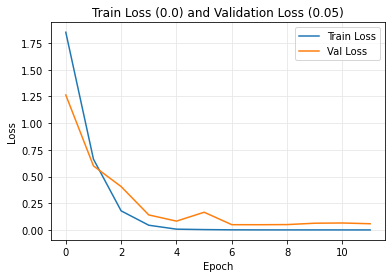

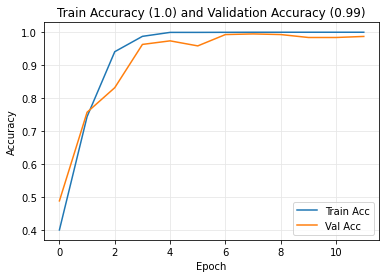

In [9]:
fit_hist = pd.DataFrame(history.history)

loss = round(np.min(fit_hist['loss']), 2)
val_loss = round(np.min(fit_hist['val_loss']), 2)
acc = round(np.max(fit_hist['accuracy']), 2)
val_acc = round(np.max(fit_hist['val_accuracy']), 2)

plt.title(f"Train Loss ({loss}) and Validation Loss ({val_loss})")
plt.plot(fit_hist['loss'], label='Train Loss')
plt.plot(fit_hist['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(color='#e6e6e6')
plt.legend()
plt.show()

plt.title(f"Train Accuracy ({acc}) and Validation Accuracy ({val_acc})")
plt.plot(fit_hist['accuracy'], label='Train Acc')
plt.plot(fit_hist['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(color='#e6e6e6')
plt.legend()
plt.show()

In [23]:
for x in test_ds_:
    x0=x
    break

print(x0[0][0])

tf.Tensor(
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]], shape=(100, 100, 3), dtype=uint8)


In [88]:
def predict_visual(index=0):
    plt.imshow(x0[0][index])
    predicted_tsr = model.predict(tf.expand_dims(x0[0][index],0))[0]
    return get_fruit_name(predicted_tsr)

'Mulberry'

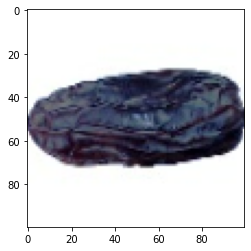

In [107]:
predict_visual(490)

In [71]:
get_fruit_name(model.predict(tf.expand_dims(x0[0][150],0)))

'Avocado'

In [82]:
model.predict(tf.expand_dims(x0[0][150],0))[0]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [83]:
np.where(model.predict(tf.expand_dims(x0[0][150],0))[0]==1)

(array([1], dtype=int64),)

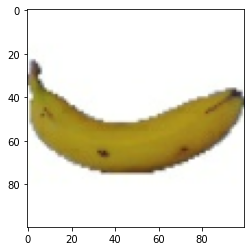

In [72]:
plt.imshow(x0[0][150])

In [76]:
fruits

['Avocado',
 'Banana',
 'Cocos',
 'Dates',
 'Kaki',
 'Lychee',
 'Mangostan',
 'Mulberry',
 'Pear',
 'Pomegranate']

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [63]:
import os
fruits = os.listdir("D:/data/fruits-10-high-calorie/Training/")

def get_fruit_name(tsr):
    return fruits[np.where(tsr==1)[0][0]]

In [77]:
fruits[1]

'Banana'

In [110]:
fruits

['Avocado',
 'Banana',
 'Cocos',
 'Dates',
 'Kaki',
 'Lychee',
 'Mangostan',
 'Mulberry',
 'Pear',
 'Pomegranate']